In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading training data from a csv file

In [2]:
train_data = pd.read_csv('train_loan.csv')

# Checking dataset information

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_data.shape

(614, 13)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Checking for missing values

In [8]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Here we can see few categorical and numerical columns are having missing values.
# Next step will be handling these missing data using python 

# Handling missing data 

# 1. Plot a histogram to check the skeness of numerical data columns

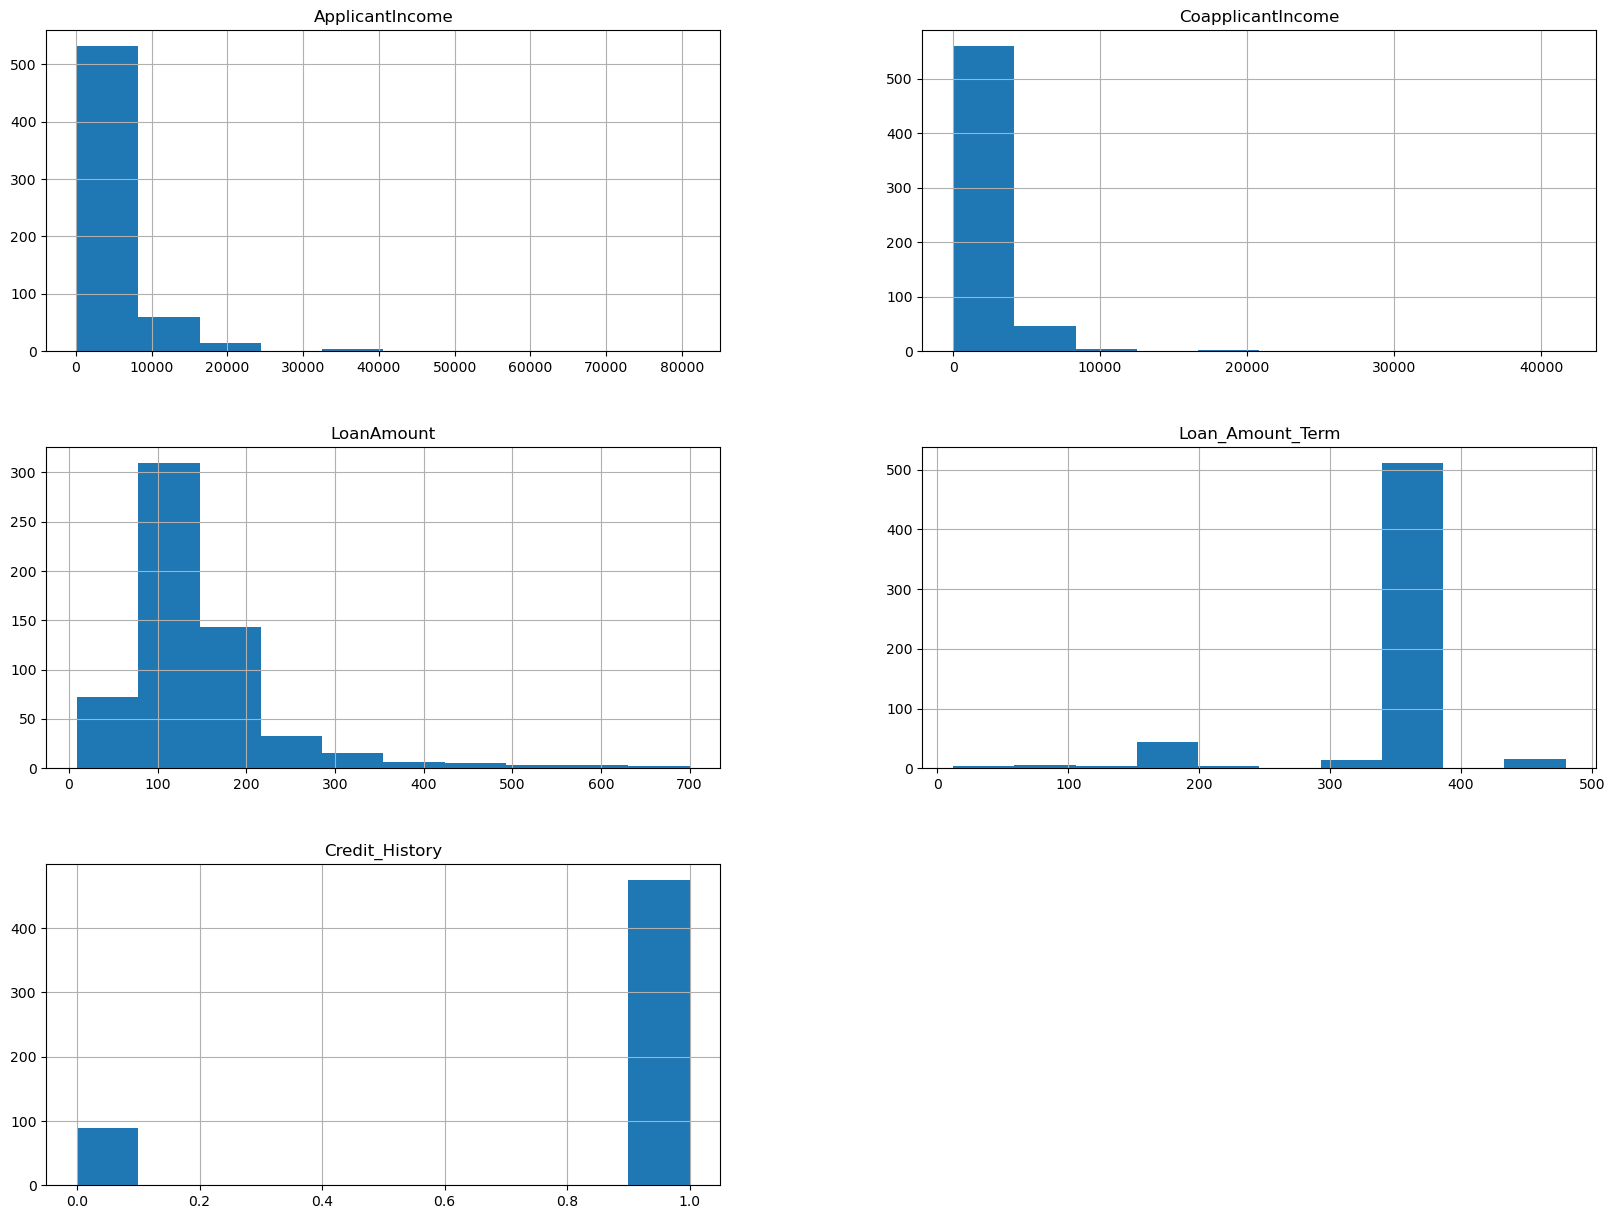

In [10]:
plot_num_columns = train_data.select_dtypes(include = ['float', 'int'])
plot_num_columns.hist(figsize=(20, 15))
plt.show()

# Filling missing values

In [11]:
# Here we can see in the histogram the data are right skewed, so we can use the median to file the data.

In [12]:
num_colums = ['LoanAmount','Loan_Amount_Term', 'Credit_History']

In [13]:
for col in num_colums:
    train_data[col] = train_data[col].fillna(train_data[col].median())

# Verifying the dataset after handling missing data

In [14]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

# 2. Handling missing values in categorical data

In [15]:
train_data[train_data['Gender'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,1.0,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [16]:
# Compute the mode
mode_value = train_data['Gender'].mode()[0]
mode_value

'Male'

In [17]:
# Fill the missing values with mode
train_data['Gender'].fillna(mode_value, inplace=True)

In [18]:
train_data.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
train_data[train_data['Married'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,128.0,240.0,1.0,Semiurban,Y


In [20]:
# Compute the mode
mode_value = train_data['Married'].mode()[0]
mode_value

'Yes'

In [21]:
# Fill the missing values with mode
train_data['Married'].fillna(mode_value, inplace=True)

In [22]:
# Compute the mode
mode_value = train_data['Self_Employed'].mode()[0]
mode_value

'No'

In [23]:
# Fill the missing values with mode
train_data['Self_Employed'].fillna(mode_value, inplace=True)

In [24]:
train_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [25]:
# replacing 3+ with 3
train_data['Dependents'] = train_data['Dependents'].replace('3+', '3')

In [26]:
# converting the column to numeric type
train_data['Dependents']=pd.to_numeric(train_data['Dependents'], errors='coerce')

In [27]:
train_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0.0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [28]:
train_data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [30]:
train_data[train_data['Dependents'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,128.0,360.0,1.0,Urban,Y
104,LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,360.0,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [31]:
df = pd.DataFrame(train_data['Dependents'])

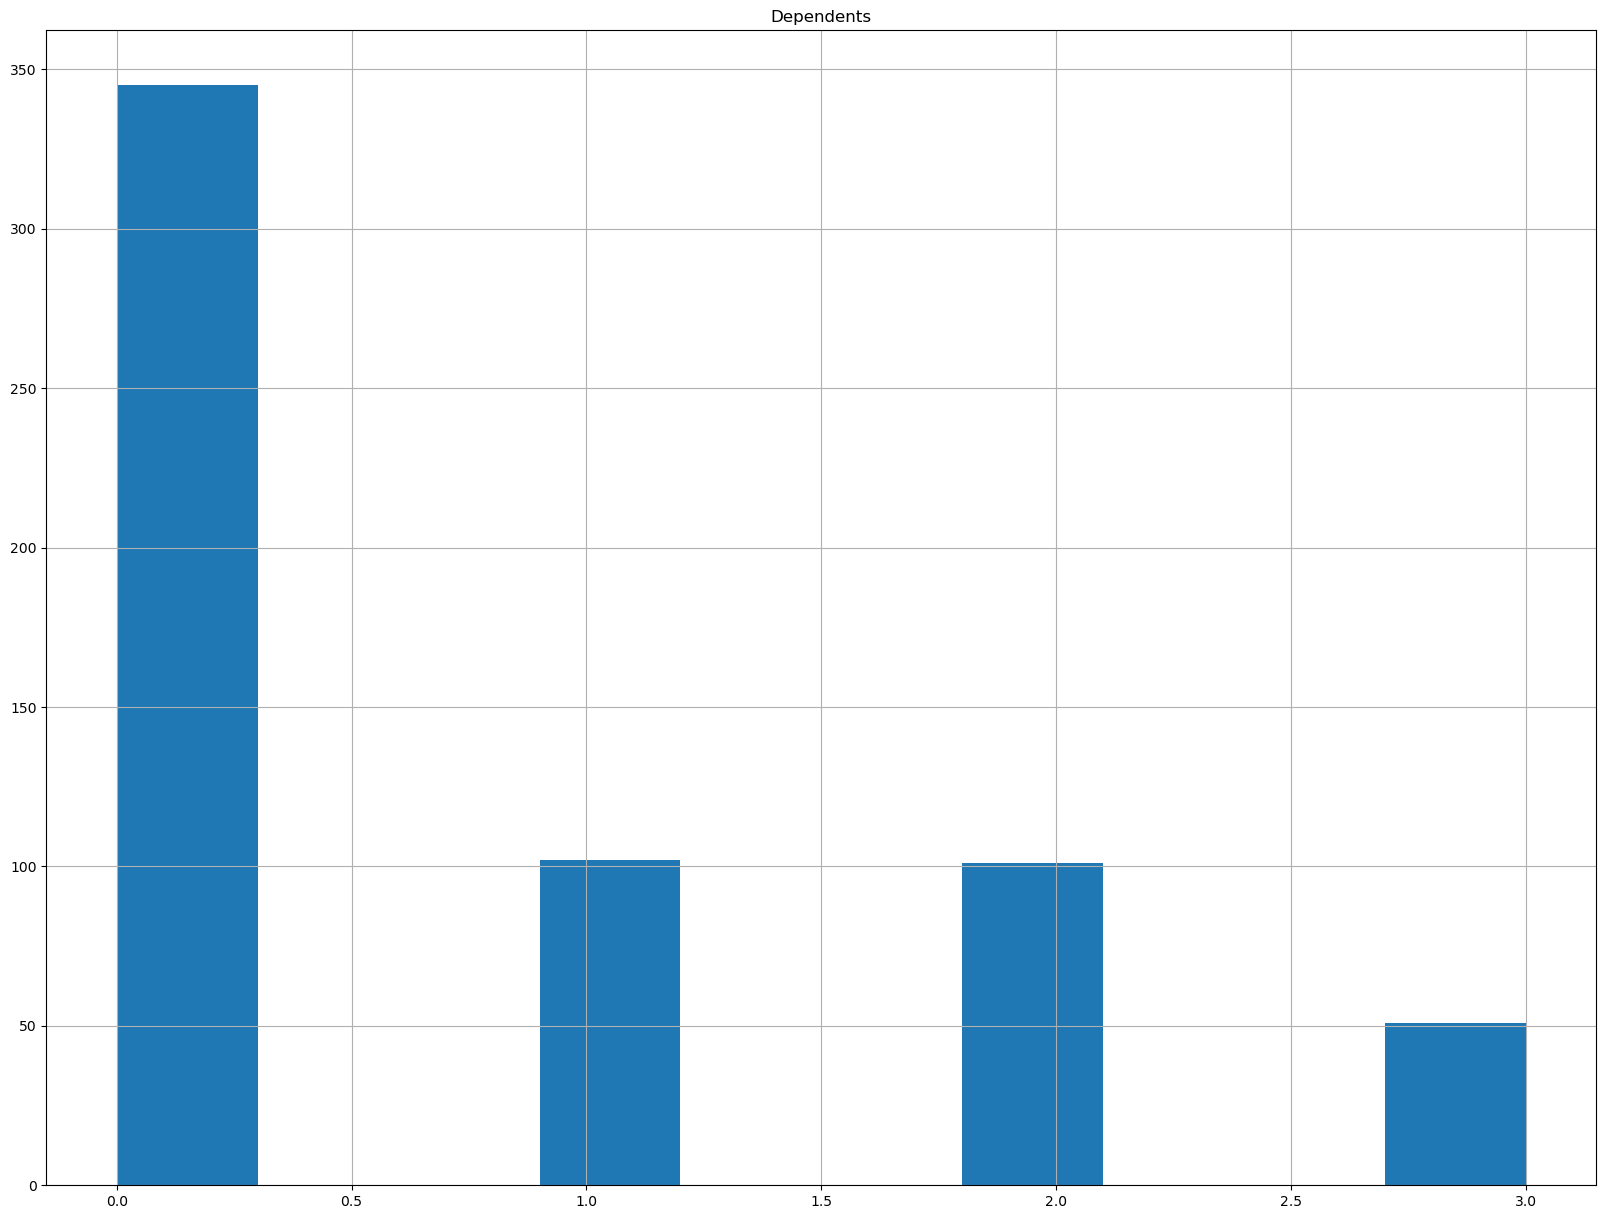

In [32]:
# Plot histogram of Dependents column
df.hist(figsize=(20, 15))
plt.show()

In [33]:
train_data['Dependents'] = train_data['Dependents'].fillna(train_data['Dependents'].median())

In [34]:
train_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Finding outliers using box plot

Text(0.5, 1.0, 'ApplicantIncome Box Plot')

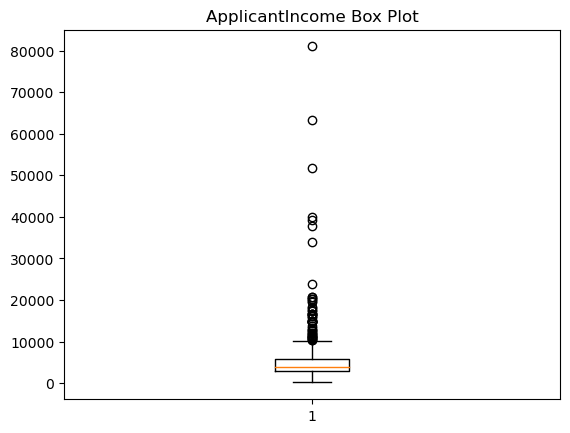

In [35]:
plt.boxplot(train_data['ApplicantIncome'])
plt.title('ApplicantIncome Box Plot')

In [36]:
Q1 = np.percentile(train_data['ApplicantIncome'], 25, method = 'midpoint')
Q2 = np.percentile(train_data['ApplicantIncome'], 50, method = 'midpoint')
Q3 = np.percentile(train_data['ApplicantIncome'], 75, method = 'midpoint')

In [37]:
print('Q1 : ', Q1)
print('Q2 : ', Q2)
print('Q3 : ', Q3)

Q1 :  2879.0
Q2 :  3812.5
Q3 :  5790.0


In [38]:
IQR = Q3 - Q1

In [39]:
low_limit = Q1 - 1.5 * IQR

In [40]:
up_limit = Q3 + 1.5 * IQR

In [41]:
print('Lower Limit : ', low_limit)

Lower Limit :  -1487.5


In [42]:
print('Upper Limit :', up_limit)

Upper Limit : 10156.5


In [43]:
outlier = []
for x in train_data['ApplicantIncome']:
    if((x > up_limit) or (x < low_limit)):
        outlier.append(x)

In [44]:
outlier

[12841,
 12500,
 11500,
 10750,
 13650,
 11417,
 14583,
 10408,
 23803,
 10513,
 20166,
 14999,
 11757,
 14866,
 39999,
 51763,
 33846,
 39147,
 12000,
 11000,
 16250,
 14683,
 11146,
 14583,
 20667,
 20233,
 15000,
 63337,
 19730,
 15759,
 81000,
 14880,
 12876,
 10416,
 37719,
 16692,
 16525,
 16667,
 10833,
 18333,
 17263,
 20833,
 13262,
 17500,
 11250,
 18165,
 19484,
 16666,
 16120,
 12000]

# Finding the index of outlier data

In [45]:
ind1 = train_data['ApplicantIncome'] > up_limit

In [46]:
train_data.loc[ind1].index

Int64Index([  9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144,
            146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308,
            324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483,
            487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 604],
           dtype='int64')

# Droping outlier data

In [47]:
train_data.drop(train_data.loc[ind1].index, inplace = True)

Text(0.5, 1.0, 'ApplicantIncome Box Plot')

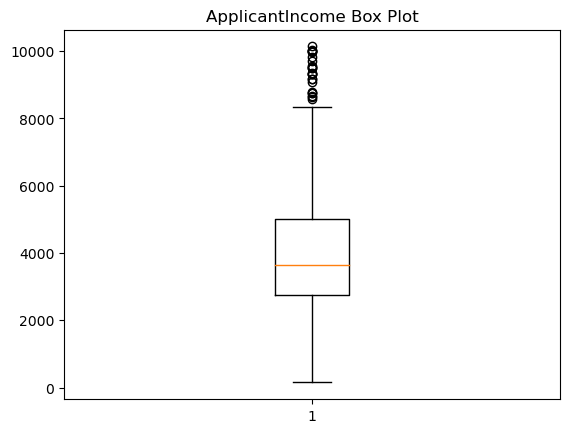

In [48]:
plt.boxplot(train_data['ApplicantIncome'])
plt.title('ApplicantIncome Box Plot')

Text(0.5, 1.0, 'CoapplicantIncome Box Plot')

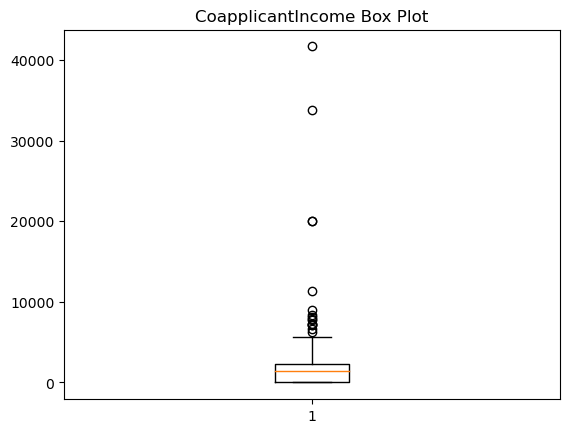

In [49]:
plt.boxplot(train_data['CoapplicantIncome'])
plt.title('CoapplicantIncome Box Plot')

In [50]:
Q1 = np.percentile(train_data['CoapplicantIncome'], 25, method = 'midpoint')
Q2 = np.percentile(train_data['CoapplicantIncome'], 50, method = 'midpoint')
Q3 = np.percentile(train_data['CoapplicantIncome'], 75, method = 'midpoint')
    

In [51]:
print('Q1 : ', Q1)
print('Q2 : ', Q2)
print('Q3 : ', Q3)

Q1 :  0.0
Q2 :  1405.5
Q3 :  2338.0


In [52]:
IQR = Q3 - Q1

In [53]:
low_limit = Q1 - 1.5 * IQR

In [54]:
up_limit = Q3 + 1.5 * IQR

In [55]:
print('Lower Limit : ', low_limit)

Lower Limit :  -3507.0


In [56]:
print('Upper Limit :', up_limit)

Upper Limit : 5845.0


In [57]:
outlier = []
for x in train_data['CoapplicantIncome']:
    if((x > up_limit) or (x < low_limit)):
        outlier.append(x)

In [58]:
outlier

[8106.0,
 7210.0,
 8980.0,
 7750.0,
 11300.0,
 7250.0,
 7101.0,
 6250.0,
 7873.0,
 20000.0,
 20000.0,
 8333.0,
 6666.0,
 7166.0,
 33837.0,
 41667.0]

In [59]:
ind1 = train_data['CoapplicantIncome'] > up_limit

In [60]:
train_data.loc[ind1].index

Int64Index([12, 38, 122, 135, 177, 180, 253, 349, 372, 402, 417, 444, 513, 523,
            581, 600],
           dtype='int64')

In [61]:
train_data.drop(train_data.loc[ind1].index, inplace = True)

Text(0.5, 1.0, 'CoapplicantIncome Box Plot')

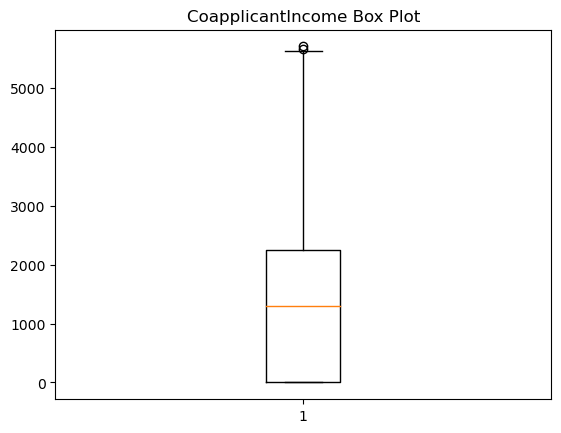

In [62]:
plt.boxplot(train_data['CoapplicantIncome'])
plt.title('CoapplicantIncome Box Plot')

In [63]:
train_data.shape

(548, 13)

# Encoding categorical column

In [64]:

train_data['Loan_Status'] = train_data.Loan_Status.map({'Y': 1, 'N': 0}).astype(int)


In [65]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [66]:

train_data = train_data.replace({"Gender":{"Male":1, "Female":0 }})

In [67]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [68]:

train_data =train_data.replace({"Married" :{"Yes":1, "No":0}})

In [69]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1,1,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [70]:
train_data['Education'].value_counts()

Graduate        417
Not Graduate    131
Name: Education, dtype: int64

In [71]:
train_data= train_data.replace({"Education":{"Graduate":1, "Not Graduate":0 }})

In [72]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,1,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1,1,1.0,1,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0.0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0.0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0.0,1,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [73]:
train_data['Self_Employed'].value_counts()

No     484
Yes     64
Name: Self_Employed, dtype: int64

In [74]:
train_data= train_data.replace({"Self_Employed":{"Yes":1, "No":0 }})

In [75]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [76]:
train_data['Property_Area'] = train_data['Property_Area'].map({'Rural': 0, 'Urban': 1, 'Semiurban': 2})

In [77]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,1,1


In [78]:
train_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,0,0,0.0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3.0,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1.0,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,LP002984,1,1,2.0,1,0,7583,0.0,187.0,360.0,1.0,1,1
613,LP002990,0,0,0.0,1,1,4583,0.0,133.0,360.0,0.0,2,0


In [79]:
train_data = train_data.drop(columns=['Loan_ID'])

In [80]:
train_data.shape

(548, 12)

In [81]:
# separating the data and labels
X = train_data.drop(columns = 'Loan_Status', axis=1)
Y = train_data['Loan_Status']

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state=42)

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [85]:
y_pred = rfc.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score

In [87]:
print('Accuracy is : ', accuracy_score(Y_test, y_pred))
print('precision_score is : ', precision_score(Y_test, y_pred))
print('recall_score is : ', recall_score(Y_test, y_pred))
print('f1_score is : ', f1_score(Y_test, y_pred))
print('Accuracy is : ', accuracy_score(Y_test, y_pred))

Accuracy is :  0.781021897810219
precision_score is :  0.8018867924528302
recall_score is :  0.9042553191489362
f1_score is :  0.8500000000000001
Accuracy is :  0.781021897810219


In [88]:
rfc1 = RandomForestClassifier(n_estimators = 150)
rfc1.fit(X_train, Y_train)
y_pred = rfc1.predict(X_test)

In [89]:
print('Accuracy is : ', accuracy_score(Y_test, y_pred))
print('precision_score is : ', precision_score(Y_test, y_pred))
print('recall_score is : ', recall_score(Y_test, y_pred))
print('f1_score is : ', f1_score(Y_test, y_pred))
print('Accuracy is : ', accuracy_score(Y_test, y_pred))

Accuracy is :  0.7956204379562044
precision_score is :  0.8
recall_score is :  0.9361702127659575
f1_score is :  0.8627450980392157
Accuracy is :  0.7956204379562044


In [90]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [91]:
base_estimator = LogisticRegression()
bc = BaggingClassifier(estimator = base_estimator, n_estimators = 10)

In [92]:
bc.fit(X_train, Y_train)
y_pred = bc.predict(X_test)

/Users/anoop/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/anoop/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [93]:
print('Accuracy is : ', accuracy_score(Y_test, y_pred))
print('precision_score is : ', precision_score(Y_test, y_pred))
print('recall_score is : ', recall_score(Y_test, y_pred))
print('f1_score is : ', f1_score(Y_test, y_pred))
print('Accuracy is : ', accuracy_score(Y_test, y_pred))

Accuracy is :  0.8394160583941606
precision_score is :  0.8157894736842105
recall_score is :  0.9893617021276596
f1_score is :  0.8942307692307693
Accuracy is :  0.8394160583941606


In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)

In [96]:
print('Accuracy is : ', accuracy_score(Y_test, y_pred))
print('precision_score is : ', precision_score(Y_test, y_pred))
print('recall_score is : ', recall_score(Y_test, y_pred))
print('f1_score is : ', f1_score(Y_test, y_pred))
print('Accuracy is : ', accuracy_score(Y_test, y_pred))

Accuracy is :  0.7299270072992701
precision_score is :  0.8
recall_score is :  0.8085106382978723
f1_score is :  0.8042328042328043
Accuracy is :  0.7299270072992701


In [97]:
base_estimator = DecisionTreeClassifier()
bc = BaggingClassifier(estimator = base_estimator, n_estimators = 100)

In [98]:
bc.fit(X_train, Y_train)
y_pred = bc.predict(X_test)

In [99]:
print('Accuracy is : ', accuracy_score(Y_test, y_pred))
print('precision_score is : ', precision_score(Y_test, y_pred))
print('recall_score is : ', recall_score(Y_test, y_pred))
print('f1_score is : ', f1_score(Y_test, y_pred))
print('Accuracy is : ', accuracy_score(Y_test, y_pred))

Accuracy is :  0.8029197080291971
precision_score is :  0.8130841121495327
recall_score is :  0.925531914893617
f1_score is :  0.8656716417910447
Accuracy is :  0.8029197080291971


In [100]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators = 100, random_state = 42)

In [101]:
abc.fit(X_train, Y_train)
y_pred = abc.predict(X_test)

In [102]:
print('Accuracy is : ', accuracy_score(Y_test, y_pred))
print('precision_score is : ', precision_score(Y_test, y_pred))
print('recall_score is : ', recall_score(Y_test, y_pred))
print('f1_score is : ', f1_score(Y_test, y_pred))
print('Accuracy is : ', accuracy_score(Y_test, y_pred))

Accuracy is :  0.7737226277372263
precision_score is :  0.8118811881188119
recall_score is :  0.8723404255319149
f1_score is :  0.841025641025641
Accuracy is :  0.7737226277372263


In [103]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 50, max_depth = 3, random_state = 42)

In [104]:
gbc.fit(X_train, Y_train)
y_pred = gbc.predict(X_test)

In [105]:
print('Accuracy is : ', accuracy_score(Y_test, y_pred))
print('precision_score is : ', precision_score(Y_test, y_pred))
print('recall_score is : ', recall_score(Y_test, y_pred))
print('f1_score is : ', f1_score(Y_test, y_pred))
print('Accuracy is : ', accuracy_score(Y_test, y_pred))

Accuracy is :  0.8102189781021898
precision_score is :  0.8035714285714286
recall_score is :  0.9574468085106383
f1_score is :  0.8737864077669905
Accuracy is :  0.8102189781021898


In [106]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()

In [107]:
xgb_model.fit(X_train, Y_train)
y_pred = xgb_model.predict(X_test)

In [108]:
print('Accuracy is : ', accuracy_score(Y_test, y_pred))
print('precision_score is : ', precision_score(Y_test, y_pred))
print('recall_score is : ', recall_score(Y_test, y_pred))
print('f1_score is : ', f1_score(Y_test, y_pred))
print('Accuracy is : ', accuracy_score(Y_test, y_pred))

Accuracy is :  0.7372262773722628
precision_score is :  0.7959183673469388
recall_score is :  0.8297872340425532
f1_score is :  0.8125
Accuracy is :  0.7372262773722628


In [109]:
from sklearn import svm
base_estimator = svm.SVC(kernel='linear')
bc = BaggingClassifier(estimator = base_estimator, n_estimators = 100)

In [ ]:
bc.fit(X_train, Y_train)
y_pred = bc.predict(X_test)

In [ ]:
print('Accuracy is : ', accuracy_score(Y_test, y_pred))
print('precision_score is : ', precision_score(Y_test, y_pred))
print('recall_score is : ', recall_score(Y_test, y_pred))
print('f1_score is : ', f1_score(Y_test, y_pred))
print('Accuracy is : ', accuracy_score(Y_test, y_pred))